In [67]:
import matplotlib.pylab as plt
import numpy as np

## 고유값 분해
1. 고유값을 n개를 찾는다.
1. 고유값별로 고유벡터를 찾는다.
1. 고유벡터들을 정규화한다.
1. 대칭행렬 A는 $PDP^{-1}$로 표현되는데, 풀이를 해보면 다음과 같이 된다.
$$
\begin{align}
A = PDP^{-1} = \sum_{i=1}^{N} {\lambda_i} v_i v_i^T  
\end{align}
$$
1. 결국 A는 고유값 $\lambda_i v_i v_i^T$들의 합으로 재구성할 수 있다.
1. $v_i v_i^T$는 정규벡터라서 길이가 1이다($ norm(v_i) = 1 $)
1. 그래서 $v_i v_i^T$는 별로 큰 값이 아니다.
1. 작은 $\lambda_i$들을 작은 $v_i v_i^T$들과 곱해봐야 값이 별로 크지 않다. 즉 미세한 값이다.
1. A를 정확하게 재구성하기 위해서는 모든 $\lambda_i v_i v_i^T$들을 더해야 하는데
1. 큰 $\lambda_i$들로만 재구성해도 A와 많이 차이나지 않는다. 
1. 즉 A의 근사치를 계산할 수 있다.


## 파이썬으로 고유값 분해
- np.linalg.eig(A) 로 행렬 A의 고유값과 고유벡터를 찾을 수 있다.
- np.linalg.eig()의 리턴 값이 두개인데 다음과 같다.
    - w: 고유값 배열
    - v: 직교정규화된 고유벡터들이다. 고유값 `w[i]`에 대응되는 고유벡터는 `v[:,i]`이다.


- 다음과 같이 호출한다.

```python
eigen_values, eigen_vectors = np.linalg.eig(A)
print(f'첫번째 고유값:', eigen_values[0])
print(f'첫번째 고유값의 고유벡터:', eigen_vectors[:, 0])
```

### 파이썬에서 고유값 및 고유벡터 계산하는 법
- 파이썬으로 고유값과 고유벡터를 계산하는 것은 간단하다.
- `np.linalg.eig(A)`를 호출하면 A의 고유값과 고유벡터들이 리턴된다.
    - 고유벡터들은 모두 정규화 되어 있다.
    - 그래서 그람슈미트가 필요없다. 편하다

In [93]:
A = np.array([[1,2],[9,1]])
eig_values, eig_vectors = np.linalg.eig(A)
eig_values, eig_vectors

(array([ 5.24264069, -3.24264069]),
 array([[ 0.42640143, -0.42640143],
        [ 0.90453403,  0.90453403]]))

### 고유값으로 대각행렬 만들고
- $A = PDP^{-1}$에서 $D$ 행렬부분은 이렇게 만든다.

In [94]:
D = np.diag(eig_values)
D

array([[ 5.24264069,  0.        ],
       [ 0.        , -3.24264069]])

### 대각화시키는 행렬 P를 만들기
- 대각화 시키는 행렬 P는 np.linalg.eig(A)가 리턴한 고유벡터와 동일하다.

In [95]:
# 고유벡터들로 구성된 정규직교행렬, 열벡터가 고유벡터
P = eig_vectors

# 역행렬
P_inv = np.linalg.inv(P)
P, P_inv, P.T

(array([[ 0.42640143, -0.42640143],
        [ 0.90453403,  0.90453403]]),
 array([[ 1.17260394,  0.5527708 ],
        [-1.17260394,  0.5527708 ]]),
 array([[ 0.42640143,  0.90453403],
        [-0.42640143,  0.90453403]]))

#### 둘의 값이 같은 것을 확인
$ P^{-1}AP = D $

##### Tips
- `A @ P`는 넘파이에서 A 행렬과 P 행렬의 곱을 의미함, 파이썬 3.5부터 사용가능
- np.matmul(A,P) 보다 심플해 보이는 군

- 아래는 소숫점 계산 오차를 없애기 위해 소숫점 5자리에서 반올림했다

In [71]:
print('P_inv @ A @ P = ', np.round_(P_inv @ A @ P, 5)) # 반올림
print('\n---\n')
print('D = ', np.round_(D, 5)) # 반올림

P_inv @ A @ P =  [[-1. -0.]
 [ 0. -1.]]

---

D =  [[-1.  0.]
 [ 0. -1.]]


#### 이제 A의 n승을 쉽게 계산됨
- D행렬의 대각성분 각각을 n승하면 끝
- 아래는 3승을 계산해 본 것임

In [72]:
P @ D ** 3 @ P_inv 

array([[ 5.00000002, -6.00000002],
       [ 6.00000002, -7.00000002]])

## 고유값과 고유벡터 계산 연습해보기
- 행렬 A는 대칭행렬,3x3 행렬이므로 고유값이 3개, 고유벡터도 3개

## $A$의 근사치 계산
- $ A = PDP^{-1} $
- 참고: $v_i$는 열벡터

$
\begin{align}
A = \sum_{i=1}^{N} {\lambda_i} v_i v_i^T  
\end{align}
$

- $ v_i $는 정규직교벡터 이므로 벡터의 한 항목의 절대값이 1보다 작거나 같다.
- $ v_i v_i^T $는 영향을 별로 안주고, 거의 $\lambda_i $에 의해 A가 영향을 받는다.
- 모두 더하면 A와 정확히 일치하며
- $\lambda_i $가 큰 거 몇개만 저장해도 A 행렬의 근사치(approx)가 된다.


#### 3x3 행렬로 근사치를 계산해보자

- 아래는 3x3 행렬의 고유값과 고유벡터를 계산한 거
- 고유값과 고유벡터로 근사한게 원래 행렬과 유사한지 보는게 목표

#### 일단 샘플 대칭 행렬을 만들고
- 고유값과 고유벡터들을 계산

In [73]:
A = np.array([[60., 30., 20.],
              [30., 20., 15.],
              [20., 15., 12.]])

eig_val, eig_vec = np.linalg.eig(A)
v1 = eig_vec[:, 0:1]
v2 = eig_vec[:, 1:2]
v3 = eig_vec[:, 2:3]

eig_val, eig_vec

(array([84.49913563,  7.33962395,  0.16124042]),
 array([[ 0.82704493,  0.54744843,  0.12765933],
        [ 0.4598639 , -0.52829024, -0.71374689],
        [ 0.32329844, -0.64900666,  0.68867153]]))

#### 근사치 계산
- 3x3이라서 고유값이 3개 나오는데, 
- 고유값과 고유벡터의 곱으로 원래 행렬이 나오는지 확인해 보고
- 고유값이 큰 거 2개만으로 근사치(approx) 행렬을 만든다.
- 둘의 차이가 별로 없는 것을 볼 수 있다.

In [74]:
A = eig_val[0]*(v1 @ v1.T) + eig_val[1]*(v2 @ v2.T) + eig_val[2]* (v2 @ v2.T)
print('고유값과 고유벡터의 곱으로 원래 행렬 만들기\n', A)

A_approx = eig_val[0]*(v1 @ v1.T) + eig_val[1]*(v2 @ v2.T) # 3개의 고유값 중 큰거 2개만 
print('근사치 행렬을 만들기\n', A_approx)

고유값과 고유벡터의 곱으로 원래 행렬 만들기
 [[60.045696   29.96805904 19.92853615]
 [29.96805904 19.96285923 15.13453918]
 [19.92853615 15.13453918 11.99144477]]
근사치 행렬을 만들기
 [[59.99737228 30.01469165 19.98582449]
 [30.01469165 19.91785855 15.07925566]
 [19.98582449 15.07925566 11.92352875]]


### 어떤 이미지를 강제로 대칭행렬로 만들려면
- 이미지 행렬의 하삼각을 모두 지우고
- 상삼각부분을 하삼각으로 모두 복사하기
- 쉬운방법 없을까?

## 고유값 분해를 이용한 이미지 압축
- EVD (Eigen Value Decomposition)
- 손실압축 방식
- 이미지 행렬의 상삼각 부분을 하삼각 부분에 복사해서 대칭행렬을 만든다.
- [쑤튜브 영상을 참고함](https://www.youtube.com/watch?v=hfurr7g3vaM)

#### 대칭형태의 이미지를 만들기 위해 opencv를 사용했음

In [75]:
# OpenCV 임포트
import cv2

### 공통 함수 정의

In [76]:
# matplotlib에 이미지 표시하는 유틸리티 함수
# matplotlib는 RGB 채널을 표시하는데
# OpenCV는 BGR 순의 행렬이다.(WxHxCHANNEL에서 B,G,R 3개의 채널이 있음)
# 그래서 BGR을 RGB로 변환해서 표시
def plot_img(ax, title, img):
    ax.set_title(title)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 임의의 정방행렬을 대칭행렬로 만들기
# 테스트용 이미지 만드는 용도
def make_symmetric(mat):
    new_mat = mat.copy()
    for r in range(new_mat.shape[0]):
        for c in range(new_mat.shape[1]):
            if c < r:
                # print(r,c)
                new_mat[r, c] = new_mat[c,r]
    return new_mat

# 이미지의 각 채널별로 대칭행렬 만들기
def make_symmetric_img(image):
    b, g, r = cv2.split(image)
    bb = make_symmetric(b)
    gg = make_symmetric(g)
    rr = make_symmetric(r)
    return cv2.merge((bb,gg,rr))


### 대칭행렬 만들기
- 원본이미지를 고쳐서 대칭행렬로 만들자
- 정사각 이미지여야 대칭행렬 만들 수 있음
- 샘플 flower.jpg는 200x200 이미지

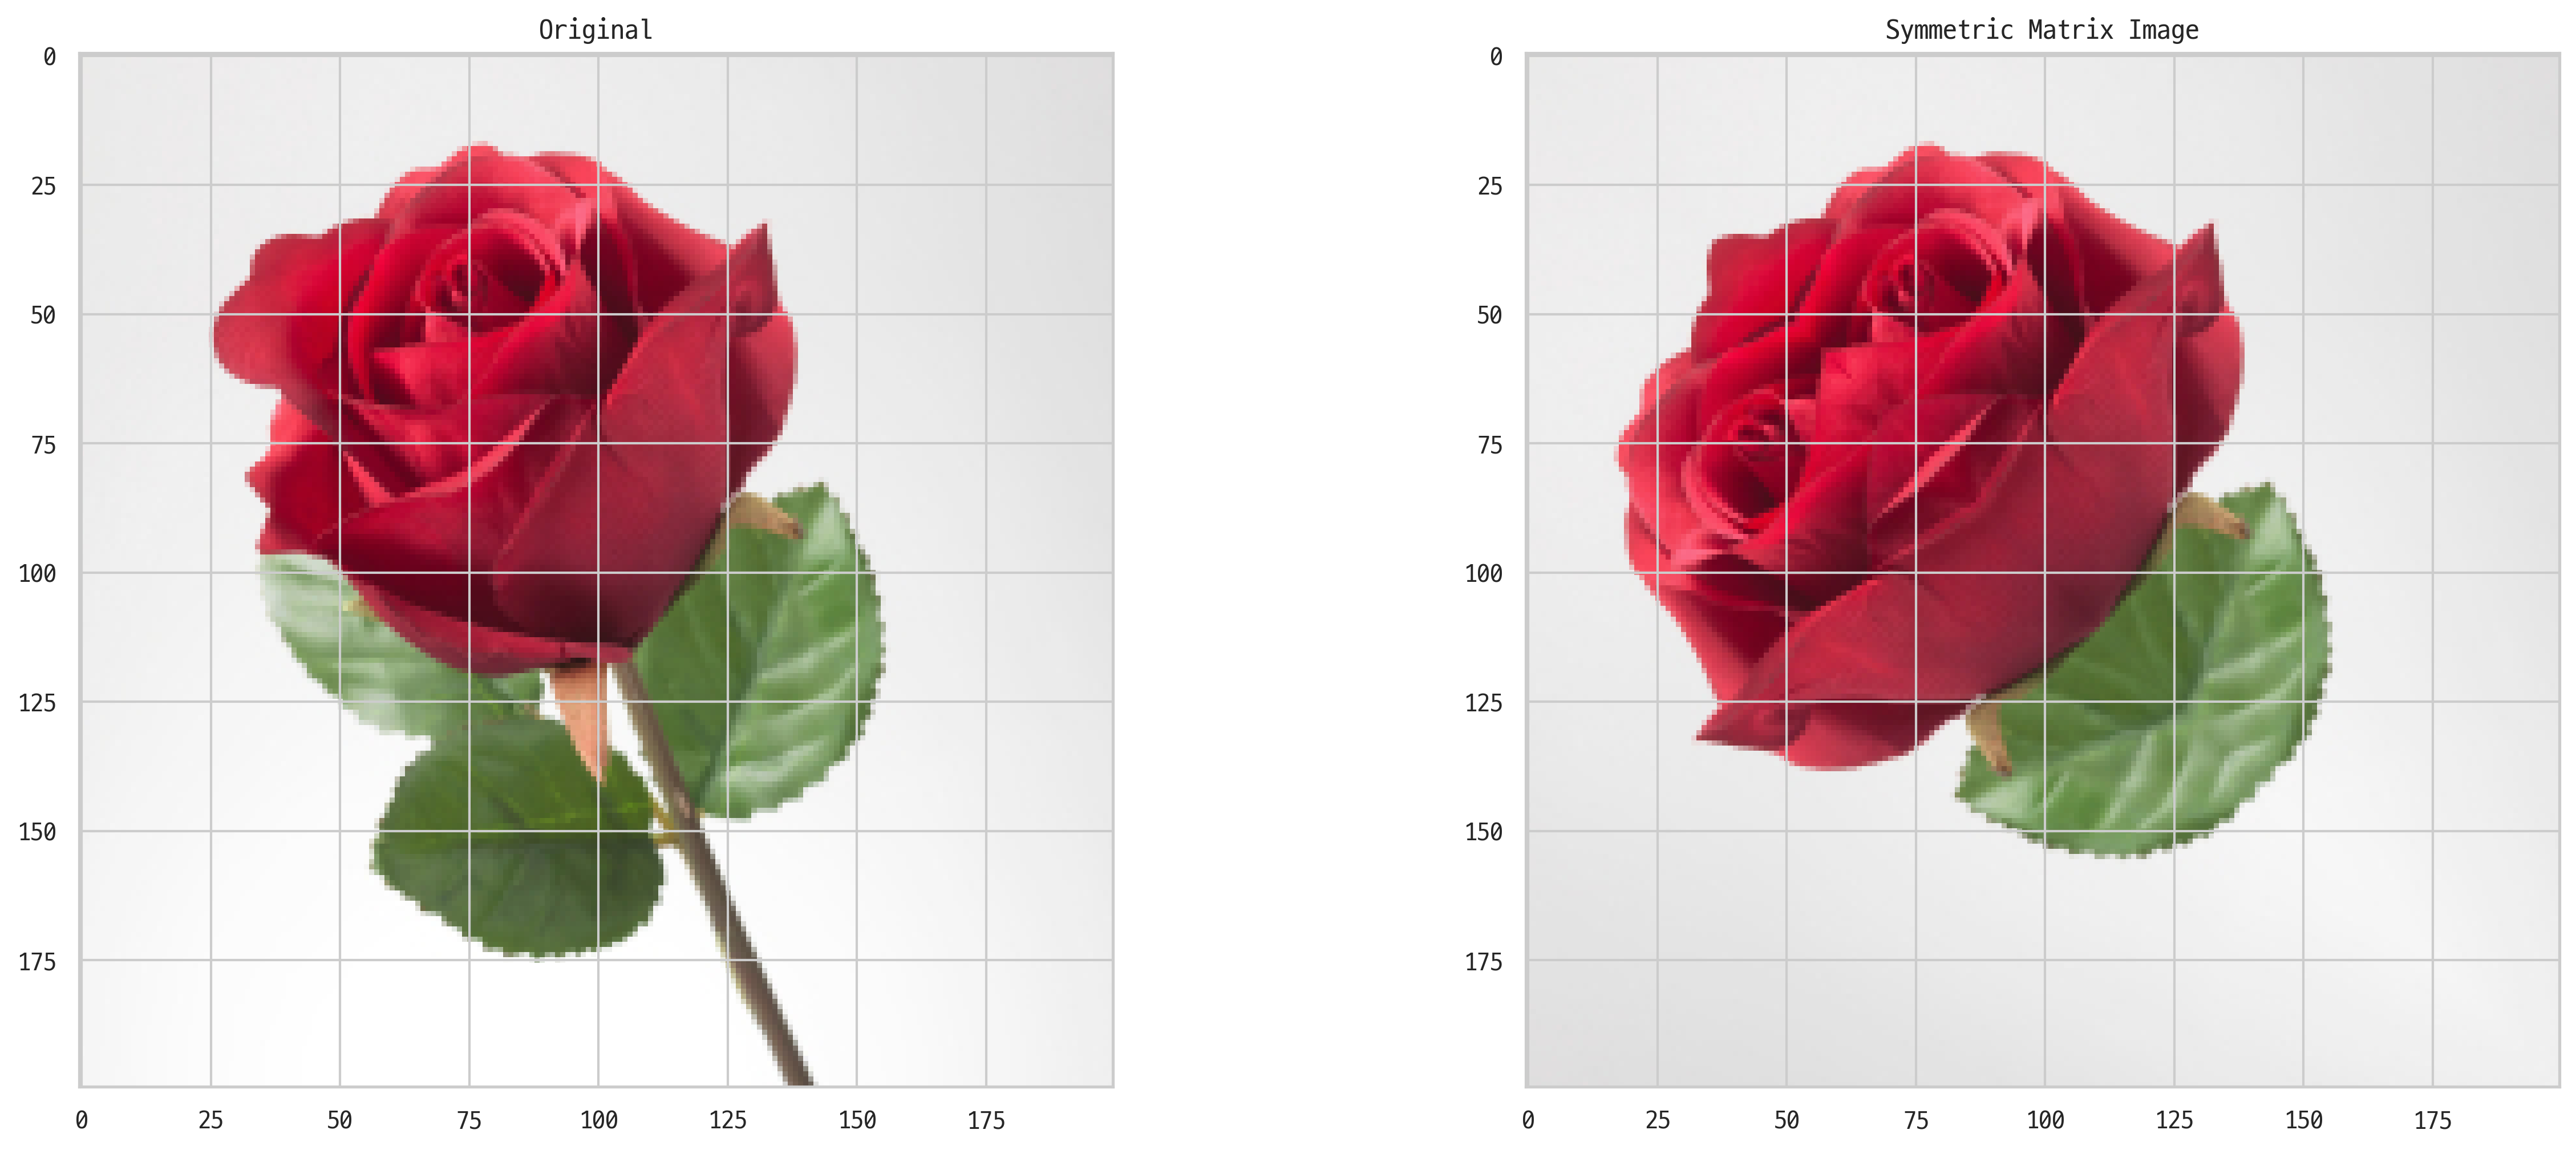

In [77]:
org_img = cv2.imread('flower.jpg', cv2.IMREAD_COLOR)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(w=20, h=8)
plot_img(ax[0], 'Original', org_img)
plot_img(ax[1], 'Symmetric Matrix Image', make_symmetric_img(org_img))

### 대칭행렬에 대해 고유값과 고유벡터 계산하기
- R,G,B 각 채널에 대해 고유값과 고유벡터 계산

In [78]:
img = make_symmetric_img(org_img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

eigen_value_b, eigen_vector_b = np.linalg.eig(img[:,:,0])
eigen_value_g, eigen_vector_g = np.linalg.eig(img[:,:,1])
eigen_value_r, eigen_vector_r = np.linalg.eig(img[:,:,2])
print('img.shape=', img.shape )
print('eigen_value_b.shape=', eigen_value_b.shape )
print('eigen_vector_b.shape=', eigen_vector_b.shape )
# print(eigen_value_b)

# 고유값을 정렬하고, 고유벡터도 정렬
def sort_by_eigen_values(eigen_values, eigen_vectors):
    # 역순, 절대값으로 정렬(절대값이 큰 것들이 영향도가 큼)
    indices = np.argsort(np.abs(eigen_values))[::-1]
    eigen_values = np.take_along_axis(eigen_values, indices, axis=0)
    return eigen_values, eigen_vectors[:,indices]

eigen_value_b, eigen_vector_b = sort_by_eigen_values(eigen_value_b, eigen_vector_b)
eigen_value_g, eigen_vector_g = sort_by_eigen_values(eigen_value_g, eigen_vector_g)
eigen_value_r, eigen_vector_r = sort_by_eigen_values(eigen_value_r, eigen_vector_r)

eigen_value_bgr = np.stack([eigen_value_b, eigen_value_g, eigen_value_r], axis=0)
eigen_vector_bgr = np.stack([eigen_vector_b, eigen_vector_g, eigen_vector_r], axis=0)

eigen_value_bgr.shape, eigen_vector_bgr.shape
print('eigen_value_bgr.shape=', eigen_value_bgr.shape )
print('eigen_vector_bgr.shape=', eigen_vector_bgr.shape )

img.shape= (200, 200, 3)
eigen_value_b.shape= (200,)
eigen_vector_b.shape= (200, 200)
eigen_value_bgr.shape= (3, 200)
eigen_vector_bgr.shape= (3, 200, 200)


### 고유벡터를 이용해 행렬의 근사치 계산
- 이미지에 근사치를 출력

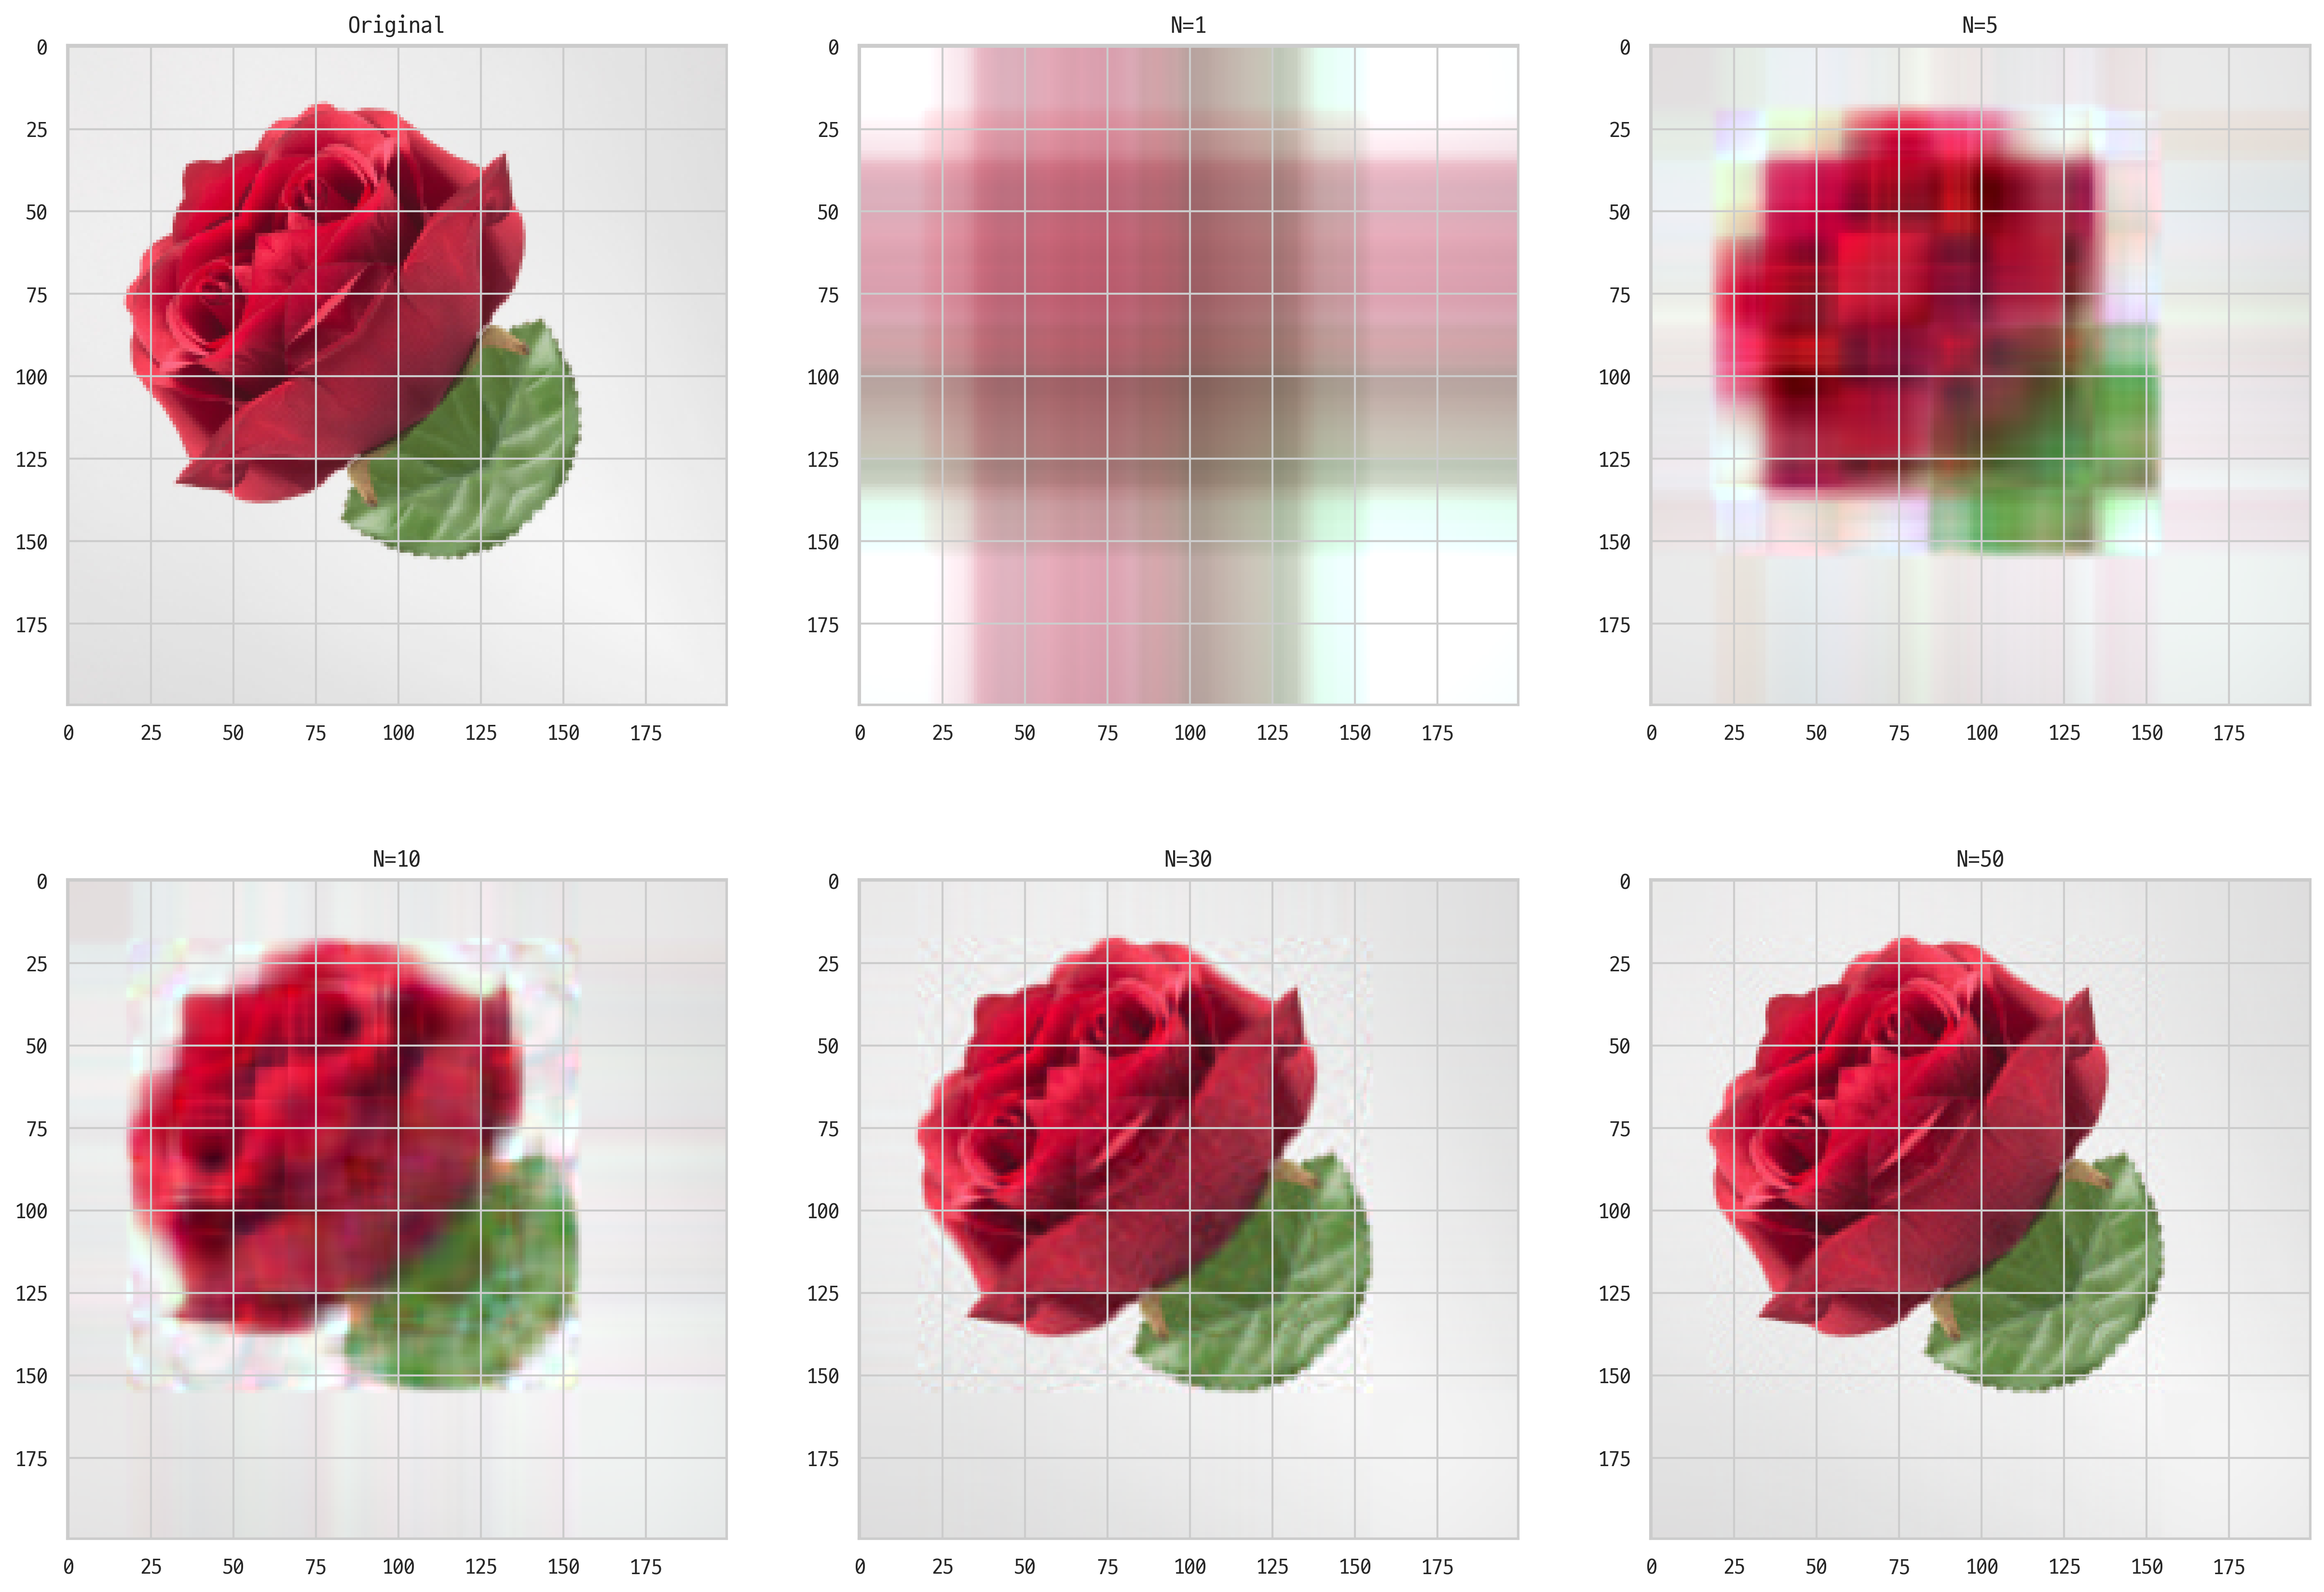

In [79]:
# RGB의 한 채널(2차원행렬)에 대해 근사치 계산
def approx(eig_value, eig_vector, n):
    width = eig_value.shape[0]
    res = np.zeros((width,width))
    for i in range(width):
        if i >= n:
            break
        v = eig_vector[:, i:i+1]
        res += (eig_value[i] * ( v @ v.T ))
    return res

# R,G,B 채널에 대해 근사치 계산
def approx_rgb(eig_value_bgr, eig_vector_bgr, n):
    b = approx(eig_value_bgr[0], eig_vector_bgr[0], n=n)
    g = approx(eig_value_bgr[1], eig_vector_bgr[1], n=n)
    r = approx(eig_value_bgr[2], eig_vector_bgr[2], n=n)
    
    # 근사치라서 255보다 조금 클 수도 있고
    # 0보다 조금 작을 수도 있다. 0~255사이로 보정
    bb = np.clip(b, 0, 255).astype('uint8')
    gg = np.clip(g, 0, 255).astype('uint8')
    rr = np.clip(r, 0, 255).astype('uint8')
    return cv2.merge((bb,gg,rr))

import functools 

# functools.partial로 함수를 단순화
# 함수에 N값만 넣어서 호출 => approximate(n)
approximate = functools.partial(approx_rgb, eig_value_bgr=eigen_value_bgr, eig_vector_bgr=eigen_vector_bgr)

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(w=20, h=14)

plot_img(ax[0,0], 'Original', img)
plot_img(ax[0,1], 'N=1', approximate(n=1))
plot_img(ax[0,2], 'N=5', approximate(n=5))
plot_img(ax[1,0], 'N=10', approximate(n=10))
plot_img(ax[1,1], 'N=30', approximate(n=30))
plot_img(ax[1,2], 'N=50', approximate(n=50))
